In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [65]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.shape

(5110, 12)

In [66]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [67]:
df=df.drop(['id'], axis=1)
df=df.dropna(subset = ["bmi"])
df=df.drop(df[df["gender"]=="Other"].index)
df['age']=df['age'].astype('int')
df=df.drop(df[(df["stroke"]==1)& (df["age"]<10)].index)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4908 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4908 non-null   object 
 1   age                4908 non-null   int32  
 2   hypertension       4908 non-null   int64  
 3   heart_disease      4908 non-null   int64  
 4   ever_married       4908 non-null   object 
 5   work_type          4908 non-null   object 
 6   Residence_type     4908 non-null   object 
 7   avg_glucose_level  4908 non-null   float64
 8   bmi                4908 non-null   float64
 9   smoking_status     4908 non-null   object 
 10  stroke             4908 non-null   int64  
dtypes: float64(2), int32(1), int64(3), object(5)
memory usage: 601.0+ KB


In [68]:
def smoke(text):
    if text == 'never smoked' or text == 'Unknown':
        return 'never smoked'
    else:
        return 'smoke'

In [69]:
df['smoking_status'] = df['smoking_status'].apply(smoke)
df['stroke'].value_counts()

0    4699
1     209
Name: stroke, dtype: int64

In [70]:
X = df.drop('stroke',axis=1)
y = df["stroke"]

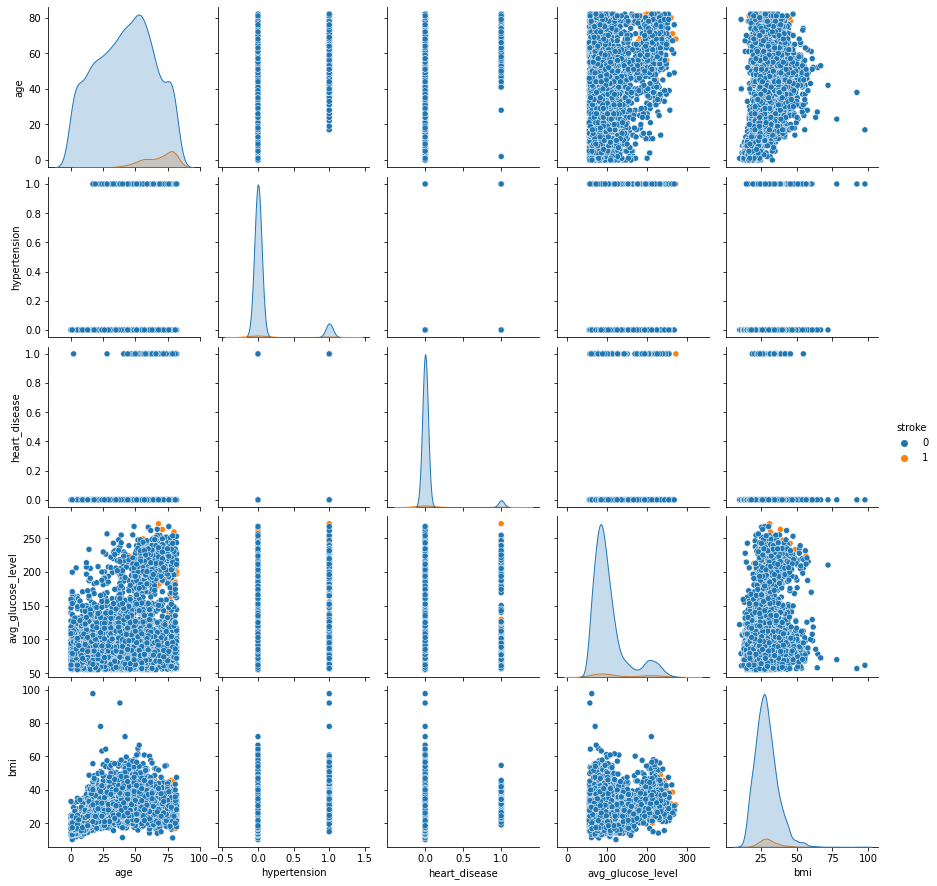

In [44]:
import seaborn as sns
newdf=pd.DataFrame(X)
newdf['stroke']=y
cols_to_plot = newdf.columns[1:6].tolist() + ['stroke']
sns.pairplot(df, hue='stroke')

In [71]:
def plot_train_time_curve(train_sizes, fit_times, title, alpha=0.1):
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    plt.plot(train_sizes, fit_times_mean, label='train points', color='blue', marker='o')
    plt.fill_between(train_sizes, fit_times_mean + fit_times_std,
                     fit_times_mean - fit_times_std, color='blue', alpha=alpha)
    plt.title(title)
    plt.xlabel('Number of training points')
    plt.ylabel('Training time')
    plt.grid(ls='--')
    plt.legend(loc='best')
    plt.show()


In [72]:
def plot_validation_curve(param_range, train_scores, test_scores, x_label, title, alpha=0.1):
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.plot(param_range, train_mean, label='train score', color='blue', marker='o')
    plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, color='blue', alpha=alpha)
    plt.plot(param_range, test_mean, label='validation score', color='red', marker='o')
    plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, color='red', alpha=alpha)
    plt.title(title)
    plt.grid(ls='--')
    plt.xlabel(x_label)
    plt.ylabel('F1 score')
    plt.legend(loc='best')
    plt.show()



In [73]:
def plot_learning_curve(train_sizes, train_scores, test_scores, title, alpha=0.1):
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.plot(train_sizes, train_mean, label='train score', color='blue', marker='o')
    plt.fill_between(train_sizes, train_mean + train_std,
                     train_mean - train_std, color='blue', alpha=alpha)
    plt.plot(train_sizes, test_mean, label='validation score', color='red', marker='o')

    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, color='red', alpha=alpha)
    plt.title(title)
    plt.xlabel('Number of training points')
    plt.ylabel('F1 score')
    plt.grid(ls='--')
    plt.legend(loc='best')
    plt.show()
    plt.savefig(title+".png")


In [75]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder
from sklearn.pipeline import make_pipeline
#from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve,validation_curve
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector 
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=40)


scaler=MinMaxScaler()
one_hot_encoder=OneHotEncoder()

numercial_cols=['age', 'bmi', 'avg_glucose_level']
catergorical_cols=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

data_prep=make_column_transformer((make_pipeline(scaler), numercial_cols),
                                  (make_pipeline(one_hot_encoder), catergorical_cols),
                                  remainder="passthrough")

X_train = data_prep.fit_transform(X_train)
X_test = data_prep.fit_transform(X_test)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)



(3435, 18)
(3435,)
(1473, 18)
(1473,)


# K-MEANS

In [76]:
from sklearn.cluster import KMeans
def k_means(X, range_n_clusters):
    inertias = []
    for n_cluster in range_n_clusters:
        kmeans = KMeans(n_clusters=n_cluster,random_state=40).fit(X)
        inertias.append(kmeans.inertia_)


    fig, ax = plt.subplots()
    ax.plot(range_n_clusters, inertias, 'o-')
    ax.grid()
    plt.xlabel("k")
    plt.ylabel("WCSS")
    plt.title('Elbow Method')
    plt.show()

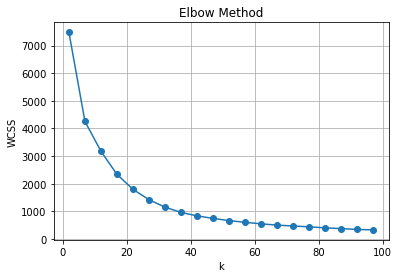

In [77]:
range_n_clusters=list(range(2, 100, 5))
k_means(X_train,range_n_clusters)

# Silhouette

In [78]:
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.metrics import silhouette_samples, silhouette_score,accuracy_score,v_measure_score
from sklearn.metrics.cluster import adjusted_mutual_info_score
from sklearn.cluster import KMeans

def silhouette_ami_plot(X, range_n_clusters, algo_name):
    silhouette_scores=[]
    adjusted_mutual_info_scores=[]
    for n_cluster in range_n_clusters:
        if algo_name=="k-Means":
            clusterer = KMeans(n_clusters=n_cluster, random_state=40)
        elif algo_name=="GMM":
            clusterer = GaussianMixture(n_components=n_cluster,random_state=40,covariance_type="full")
        y_pred = clusterer.fit_predict(X)
        sil_coeff = silhouette_score(X, y_pred)
        ami_score = adjusted_mutual_info_score(y_train, y_pred)
        silhouette_scores.append(sil_coeff)
        adjusted_mutual_info_scores.append(ami_score)
        print("For n_clusters={}, The Silhouette Score is {}".format(n_cluster, sil_coeff))
        print("For n_clusters={}, The Adjusted MI Score is {}".format(n_cluster, ami_score))
        print("-----------------------------------------------------------------------------")

    # plotting the scores against the value of k
    plt.plot(range_n_clusters, silhouette_scores, 'o-', label='Silhouette')
    plt.plot(range_n_clusters, adjusted_mutual_info_scores, 'o-', label='AMI-Score')
    plt.xlabel('k')
    plt.ylabel('Scores')
    plt.legend(loc=4)
    plt.show()
    return silhouette_scores,adjusted_mutual_info_scores

For n_clusters=2, The Silhouette Score is 0.22233113363768264
For n_clusters=2, The Adjusted MI Score is 0.01874035144649307
-----------------------------------------------------------------------------
For n_clusters=12, The Silhouette Score is 0.34454286610667856
For n_clusters=12, The Adjusted MI Score is 0.0050979131934194245
-----------------------------------------------------------------------------
For n_clusters=22, The Silhouette Score is 0.49976549567177964
For n_clusters=22, The Adjusted MI Score is 0.005402813806792532
-----------------------------------------------------------------------------
For n_clusters=32, The Silhouette Score is 0.5888752830026623
For n_clusters=32, The Adjusted MI Score is 0.0058377399964175914
-----------------------------------------------------------------------------
For n_clusters=42, The Silhouette Score is 0.6381241813169496
For n_clusters=42, The Adjusted MI Score is 0.0061054301184108465
--------------------------------------------------

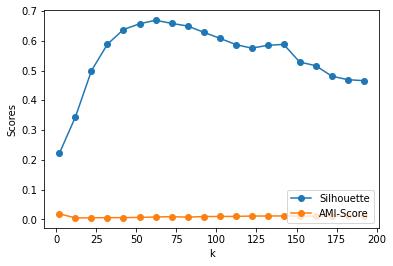

In [80]:
range_n_clusters=list(range(2, 200, 10))
silhouette_scores_kmeans = silhouette_ami_plot(X_train,range_n_clusters,"k-Means")

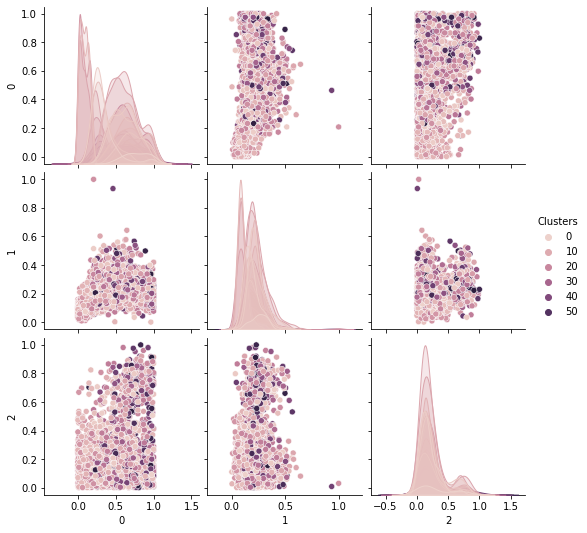

In [81]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=60,random_state=40).fit(X_train)
y_pred = kmeans.fit_predict(X_train)
import seaborn as sns
kmeansDf = pd.DataFrame(X_train)
kmeansDf['Clusters']=y_pred
#print(kmeansDf.head())
cols_to_plot = kmeansDf.columns[[0,1,2]].tolist() + ['Clusters']
sns.pairplot(kmeansDf[cols_to_plot], hue='Clusters')
plt.show()

# EMM

In [96]:
from sklearn.mixture import GaussianMixture
def bic_ami_analysis(X,n_components):
    bic_scores=[]
    adjusted_mutual_info_scores=[]
    for n_cluster in n_components:
        clusterer = GaussianMixture(n_components=n_cluster,random_state=40,covariance_type="full")
        clusterer.fit(X)
        bic_score = clusterer.bic(X)
        bic_scores.append(bic_score)
        y_pred = clusterer.predict(X)
        ami_score = adjusted_mutual_info_score(y_train, y_pred)
        adjusted_mutual_info_scores.append(ami_score) 
        print("For n_components={}, The BIC Score is {}".format(n_cluster, bic_score))
        print("For n_components={}, The Adjusted MI Score is {}".format(n_cluster, ami_score))
        print("-----------------------------------------------------------------------------")
    bic_scores = np.array(bic_scores)
    bic_scores = bic_scores/np.max(bic_scores)
    plt.plot(n_components, bic_scores, 'o-', label='BIC')
    plt.plot(n_components, adjusted_mutual_info_scores, 'o-', label='AMI-Score')
    plt.xlabel('Components')
    plt.ylabel('Scores')
    plt.legend(loc=4)
    plt.show()
    return bic_scores,adjusted_mutual_info_scores

For n_components=1, The BIC Score is -185261.09533277474
For n_components=1, The Adjusted MI Score is 0.0
-----------------------------------------------------------------------------
For n_components=11, The BIC Score is -396049.97247081436
For n_components=11, The Adjusted MI Score is 0.005813533826566946
-----------------------------------------------------------------------------
For n_components=21, The BIC Score is -431998.3576012823
For n_components=21, The Adjusted MI Score is 0.0062996701551019715
-----------------------------------------------------------------------------
For n_components=31, The BIC Score is -453840.6387228283
For n_components=31, The Adjusted MI Score is 0.005682431818770967
-----------------------------------------------------------------------------
For n_components=41, The BIC Score is -462429.46318404446
For n_components=41, The Adjusted MI Score is 0.005549731033824188
-----------------------------------------------------------------------------
For n

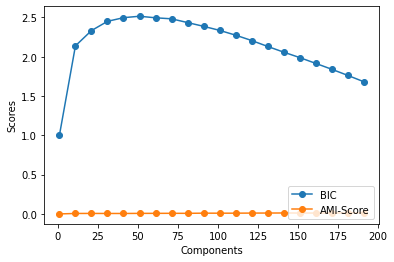

(array([1.        , 2.13779354, 2.33183528, 2.44973527, 2.49609591,
        2.51438635, 2.49452777, 2.48162077, 2.4338704 , 2.38608012,
        2.3346421 , 2.27364411, 2.20575164, 2.13023763, 2.05765118,
        1.98869721, 1.91473174, 1.84004267, 1.76193507, 1.68148891]),
 [0.0,
  0.005813533826566946,
  0.0062996701551019715,
  0.005682431818770967,
  0.005549731033824188,
  0.006922340206210552,
  0.007254255175045673,
  0.007678538876766624,
  0.007556037615195157,
  0.009639780521745071,
  0.0092246852268188,
  0.00948575467365661,
  0.010607403776883222,
  0.01115488452394667,
  0.012025140326761831,
  0.011045271503877201,
  0.011011572090407241,
  0.01196567880230298,
  0.012342058475680151,
  0.012519522569153323])

In [99]:
n_components = np.arange(1, 200, 10)
bic_ami_analysis(X_train,n_components)

For n_clusters=2, The Adjusted MI Score is 0.024812655363769438
-----------------------------------------------------------------------------
For n_clusters=3, The Adjusted MI Score is 0.010323434849158705
-----------------------------------------------------------------------------
For n_clusters=4, The Adjusted MI Score is 0.011332251385795937
-----------------------------------------------------------------------------
For n_clusters=5, The Adjusted MI Score is 0.01469892355223439
-----------------------------------------------------------------------------
For n_clusters=6, The Adjusted MI Score is 0.01196844121970892
-----------------------------------------------------------------------------
For n_clusters=7, The Adjusted MI Score is 0.010428349204311273
-----------------------------------------------------------------------------
For n_clusters=8, The Adjusted MI Score is 0.007329648011435601
-----------------------------------------------------------------------------
For n_cl

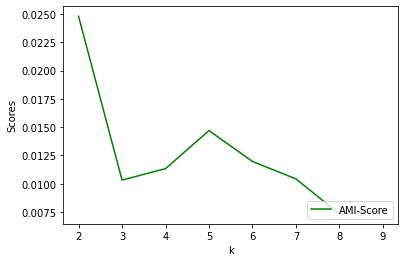

In [55]:
range_n_clusters=list(range(2, 10, 1))
ami_scores_gmm = ami_plot(X_train,range_n_clusters,"GMM")

# PCA

In [56]:
def biplot(score,coeff,variables=None,targets=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    classes = np.unique(targets)
    colors = ['b','silver','y','g']
    for s,l in enumerate(classes):
        plt.scatter(xs[targets==l]* scalex,ys[targets==l] * scaley,s=5, c = colors[s], marker='o') # color based on group
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if variables is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'black', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, variables[i], color = 'black', ha = 'center', va = 'center')
 
    plt.xlabel("Component {}".format(1))
    plt.ylabel("Component {}".format(2))
    plt.grid()

In [57]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=40)
X_pca_2d=pca.fit_transform(X_train)
# Calculate the variance explained by priciple components
print('Variance of each component:', pca.explained_variance_ratio_)
print('Total Variance Explained:', round(sum(list(pca.explained_variance_ratio_))*100, 2))

Variance of each component: [0.23722261 0.18218934]
Total Variance Explained: 41.94


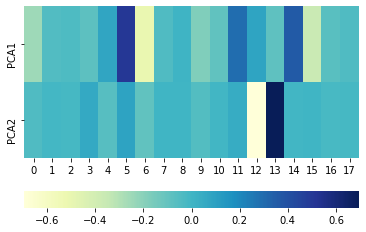

In [58]:
import seaborn as sns
ax = sns.heatmap(pca.components_,
                 cmap='YlGnBu',
                 yticklabels=[ "PCA"+str(x) for x in range(1,pca.n_components_+1)],
                 xticklabels=pd.DataFrame(X_train).columns.values,
                 cbar_kws={"orientation": "horizontal"})

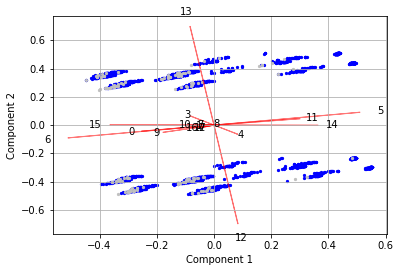

In [59]:
biplot(X_pca_2d[:,0:2],np.transpose(pca.components_[0:2, :]),pd.DataFrame(X_train).columns.values,y_train)
plt.show()

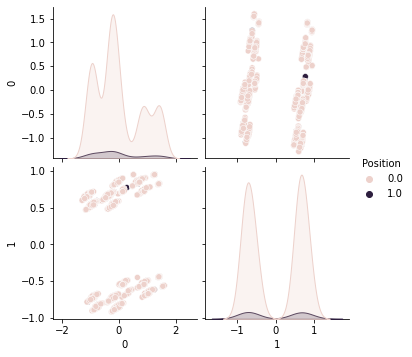

In [60]:
import seaborn as sns
pcaDf = pd.DataFrame(X_pca_2d)
pcaDf['Position']=y_train
sns.pairplot(pcaDf, hue='Position')
plt.show()

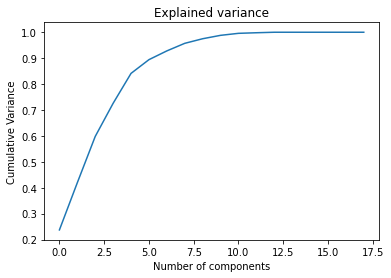

In [61]:
from sklearn.decomposition import PCA
#fitting the pca algorithm with our data
pca=PCA(random_state=40).fit(X_train)
#plotting the cumulative summation of the explained variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative Variance')
plt.title('Explained variance')
plt.show()

In [62]:
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
X_pca=pca.fit_transform(X_train)
# Calculate the variance explained by priciple components
print('Variance of each component:', pca.explained_variance_ratio_)
print('Total Variance Explained:', round(sum(list(pca.explained_variance_ratio_))*100, 2))

Variance of each component: [0.23722261 0.18218934 0.17850699 0.12788596 0.11543657 0.05295532
 0.03381833 0.02920208]
Total Variance Explained: 95.72


# PCA k-Means

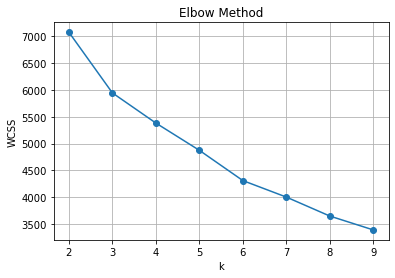

In [63]:
range_n_clusters=list(range(2, 10, 1))
k_means(X_pca,range_n_clusters)

For n_clusters=2, The Silhouette Score is 0.23629226446343896
-----------------------------------------------------------------------------
For n_clusters=3, The Silhouette Score is 0.2365353407057274
-----------------------------------------------------------------------------
For n_clusters=4, The Silhouette Score is 0.23853988753231697
-----------------------------------------------------------------------------
For n_clusters=5, The Silhouette Score is 0.2644395016918489
-----------------------------------------------------------------------------
For n_clusters=6, The Silhouette Score is 0.2960713153433937
-----------------------------------------------------------------------------
For n_clusters=7, The Silhouette Score is 0.2900222857740368
-----------------------------------------------------------------------------
For n_clusters=8, The Silhouette Score is 0.3238910669974148
-----------------------------------------------------------------------------
For n_clusters=9, The Sil

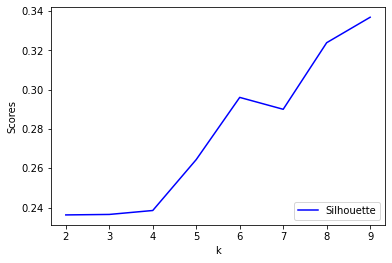

In [64]:
range_n_clusters=list(range(2, 10, 1))
silhouette_scores_pca_kmeans = silhouette_plot(X_pca,range_n_clusters,"k-Means")

For n_clusters=2, The Adjusted MI Score is 0.01874035144649307
-----------------------------------------------------------------------------
For n_clusters=3, The Adjusted MI Score is 0.013306829055504859
-----------------------------------------------------------------------------
For n_clusters=4, The Adjusted MI Score is 0.010348455546446509
-----------------------------------------------------------------------------
For n_clusters=5, The Adjusted MI Score is 0.00843169539340014
-----------------------------------------------------------------------------
For n_clusters=6, The Adjusted MI Score is 0.006956358968215463
-----------------------------------------------------------------------------
For n_clusters=7, The Adjusted MI Score is 0.006515356112082226
-----------------------------------------------------------------------------
For n_clusters=8, The Adjusted MI Score is 0.007172080069485685
-----------------------------------------------------------------------------
For n_cl

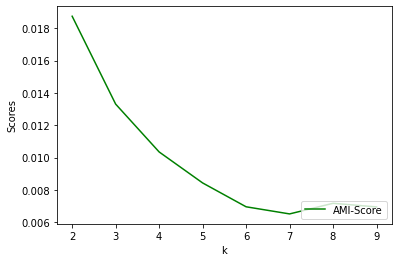

In [65]:
range_n_clusters=list(range(2, 10, 1))
ami_scores_pca_kmeans = ami_plot(X_pca,range_n_clusters,"k-Means")

# PCA EMM

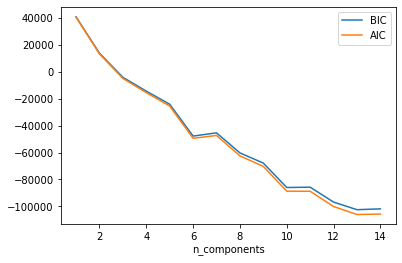

In [66]:
n_components = np.arange(1, 15)
gmm_bic_analysis(X_pca,n_components)

For n_clusters=2, The Adjusted MI Score is -0.00025059977685009364
-----------------------------------------------------------------------------
For n_clusters=3, The Adjusted MI Score is 0.012803432498246779
-----------------------------------------------------------------------------
For n_clusters=4, The Adjusted MI Score is 0.009796033248016528
-----------------------------------------------------------------------------
For n_clusters=5, The Adjusted MI Score is 0.00843169539340014
-----------------------------------------------------------------------------
For n_clusters=6, The Adjusted MI Score is 0.013835330190232207
-----------------------------------------------------------------------------
For n_clusters=7, The Adjusted MI Score is 0.012677312497570162
-----------------------------------------------------------------------------
For n_clusters=8, The Adjusted MI Score is 0.0089259275922141
-----------------------------------------------------------------------------
For n_

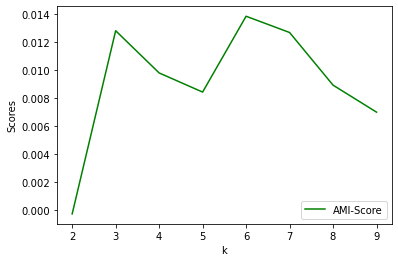

In [67]:
range_n_clusters=list(range(2, 10, 1))
ami_scores_pca_gmm = ami_plot(X_pca,range_n_clusters,"GMM")

# ICA

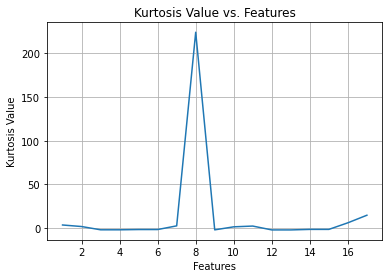

In [69]:
import scipy.stats
from sklearn.decomposition import FastICA
testDf=pd.DataFrame(X_train)
kurtosis_values = []
dims_fifa = list(range(1, 18, 1))
features=[]
for i in dims_fifa:
    kur = scipy.stats.kurtosis(testDf[i])
    kurtosis_values.append(kur)
    if kur>0.5 or kur<-.5:
        features.append(i)
kurtosis_values = np.array(kurtosis_values)
plt.plot(dims_fifa,kurtosis_values)
plt.xlabel('Features')
plt.ylabel('Kurtosis Value')
plt.title('Kurtosis Value vs. Features')
plt.grid()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA 

[-0.71254223 -0.5206215  -0.4063978  -0.33968499 -0.22126351 -0.04021765
  0.06105989  0.12025306  0.20035037  0.17691042  0.1886695   1.49325449
  1.24502069  0.16710298  0.06881852  0.17298321]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


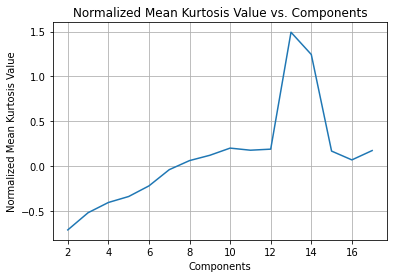

In [70]:
import scipy.stats
from sklearn.decomposition import FastICA
kurtosis_values = []
dims_fifa = list(range(2, 18, 1))
for i in dims_fifa:
    fast_ica = FastICA(n_components = i,random_state=40,max_iter=1000,tol=.001)
    data_ica = fast_ica.fit_transform(X_train)
    #print(fast_ica)
    #kur = scipy.stats.kurtosis(fast_ica.components_.transpose())
    kur = scipy.stats.kurtosis(data_ica)
    #print(kur)
    kurtosis_values.append(np.mean(kur)/i)
kurtosis_values = np.array(kurtosis_values)
print(kurtosis_values)
plt.plot(dims_fifa,kurtosis_values)
plt.xlabel('Components')
plt.ylabel('Normalized Mean Kurtosis Value')
plt.title('Normalized Mean Kurtosis Value vs. Components')
plt.grid()
plt.show()


In [75]:
from sklearn.decomposition import FastICA
fast_ica = FastICA(n_components=13, random_state=40,max_iter=1000,tol=.001)
X_ica=fast_ica.fit_transform(X_train)

# ICA k-Means

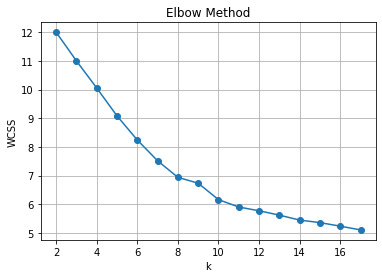

In [76]:
range_n_clusters=list(range(2, 18, 1))
k_means(X_ica,range_n_clusters)

For n_clusters=2, The Silhouette Score is 0.10188974246646104
-----------------------------------------------------------------------------
For n_clusters=3, The Silhouette Score is 0.1775615540720263
-----------------------------------------------------------------------------
For n_clusters=4, The Silhouette Score is 0.11210147387888614
-----------------------------------------------------------------------------
For n_clusters=5, The Silhouette Score is 0.15859624596506308
-----------------------------------------------------------------------------
For n_clusters=6, The Silhouette Score is 0.20694913919559674
-----------------------------------------------------------------------------
For n_clusters=7, The Silhouette Score is 0.22014712343534695
-----------------------------------------------------------------------------
For n_clusters=8, The Silhouette Score is 0.21781478699585086
-----------------------------------------------------------------------------
For n_clusters=9, The

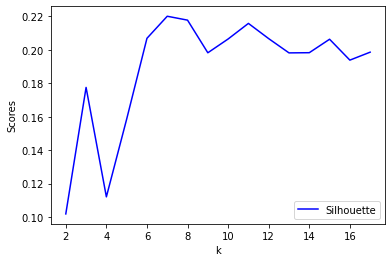

In [80]:
range_n_clusters=list(range(2, 18, 1))
silhouette_scores_ica_kmeans = silhouette_plot(X_ica,range_n_clusters,"k-Means")

For n_clusters=2, The Adjusted MI Score is 0.0065201774866736105
-----------------------------------------------------------------------------
For n_clusters=3, The Adjusted MI Score is 0.0029586114798903617
-----------------------------------------------------------------------------
For n_clusters=4, The Adjusted MI Score is 0.010302757451626903
-----------------------------------------------------------------------------
For n_clusters=5, The Adjusted MI Score is 0.014713417922345371
-----------------------------------------------------------------------------
For n_clusters=6, The Adjusted MI Score is 0.010331667976076623
-----------------------------------------------------------------------------
For n_clusters=7, The Adjusted MI Score is 0.016826031909332375
-----------------------------------------------------------------------------
For n_clusters=8, The Adjusted MI Score is 0.012533801464799354
-----------------------------------------------------------------------------
For 

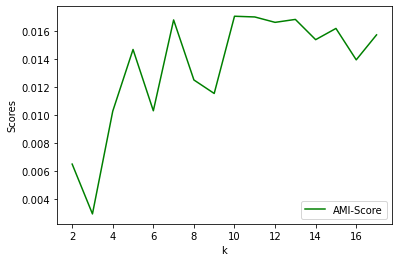

In [81]:
range_n_clusters=list(range(2, 18, 1))
ami_scores_ica_kmeans = ami_plot(X_ica,range_n_clusters,"k-Means")

# ICA EMM

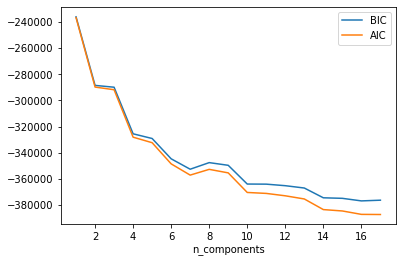

In [79]:
n_components = np.arange(1, 18)
gmm_bic_analysis(X_ica,n_components)

For n_clusters=2, The Adjusted MI Score is 0.04581971313100007
-----------------------------------------------------------------------------
For n_clusters=3, The Adjusted MI Score is 0.027581288200109844
-----------------------------------------------------------------------------
For n_clusters=4, The Adjusted MI Score is 0.024388718868126946
-----------------------------------------------------------------------------
For n_clusters=5, The Adjusted MI Score is 0.013364492964910445
-----------------------------------------------------------------------------
For n_clusters=6, The Adjusted MI Score is 0.019652259579281007
-----------------------------------------------------------------------------
For n_clusters=7, The Adjusted MI Score is 0.012241866642073435
-----------------------------------------------------------------------------
For n_clusters=8, The Adjusted MI Score is 0.009043008766098645
-----------------------------------------------------------------------------
For n_c

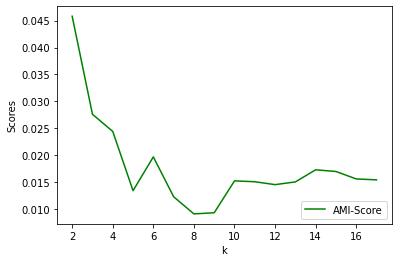

In [82]:
range_n_clusters=list(range(2, 18, 1))
ami_scores_ica_gmm = ami_plot(X_ica,range_n_clusters,"GMM")

# RP

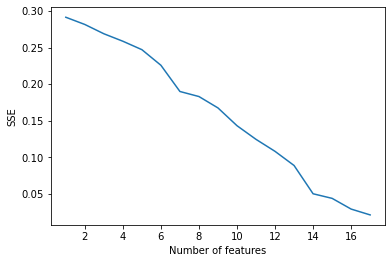

In [83]:
from sklearn.random_projection import GaussianRandomProjection
from sklearn.metrics import mean_squared_error
dims_fifa = list(range(1, 18, 1))
sse = dict()
for dim in dims_fifa:
    grp = GaussianRandomProjection(n_components=dim, random_state=40)
    x_prime = grp.fit_transform(X_train)
    # reconstruction
    A = np.linalg.pinv(grp.components_.T)
    rec_data = np.dot(x_prime, A)
    sse[dim] = mean_squared_error(X_train, rec_data)
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of features")
plt.ylabel("SSE")
plt.show()

In [84]:
from sklearn.random_projection import GaussianRandomProjection
grp = GaussianRandomProjection(n_components=7, random_state=40)
X_rp = grp.fit_transform(X_train)

# RP k-Means

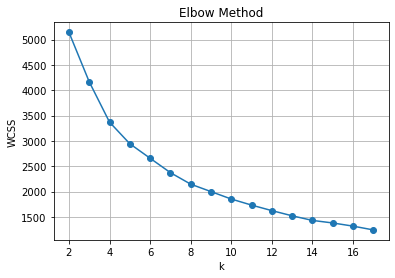

In [86]:
range_n_clusters=list(range(2, 18, 1))
k_means(X_rp,range_n_clusters)

For n_clusters=2, The Silhouette Score is 0.34258586386247075
-----------------------------------------------------------------------------
For n_clusters=3, The Silhouette Score is 0.3065213815193114
-----------------------------------------------------------------------------
For n_clusters=4, The Silhouette Score is 0.3460941126083407
-----------------------------------------------------------------------------
For n_clusters=5, The Silhouette Score is 0.3332561030326981
-----------------------------------------------------------------------------
For n_clusters=6, The Silhouette Score is 0.3274176625623934
-----------------------------------------------------------------------------
For n_clusters=7, The Silhouette Score is 0.34024170183371044
-----------------------------------------------------------------------------
For n_clusters=8, The Silhouette Score is 0.35275184853396796
-----------------------------------------------------------------------------
For n_clusters=9, The Si

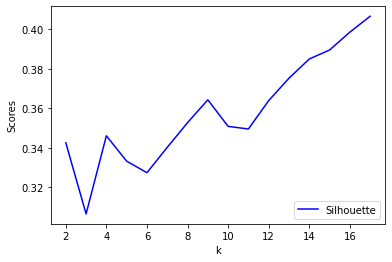

In [87]:
range_n_clusters=list(range(2, 18, 1))
silhouette_scores_rp_kmeans = silhouette_plot(X_rp,range_n_clusters,"k-Means")

# RP EMM

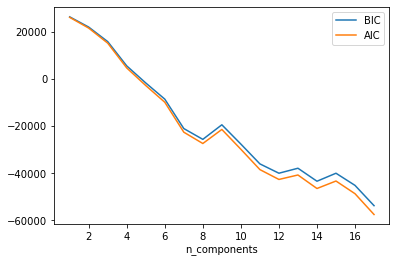

In [88]:
n_components = np.arange(1, 18)
gmm_bic_analysis(X_rp,n_components)

For n_clusters=2, The Adjusted MI Score is -0.000294208219553494
-----------------------------------------------------------------------------
For n_clusters=3, The Adjusted MI Score is 0.009700796717703474
-----------------------------------------------------------------------------
For n_clusters=4, The Adjusted MI Score is 0.00877173544434328
-----------------------------------------------------------------------------
For n_clusters=5, The Adjusted MI Score is 0.009170425119682727
-----------------------------------------------------------------------------
For n_clusters=6, The Adjusted MI Score is 0.012095629253980784
-----------------------------------------------------------------------------
For n_clusters=7, The Adjusted MI Score is 0.011183276033418113
-----------------------------------------------------------------------------
For n_clusters=8, The Adjusted MI Score is 0.009717173779222986
-----------------------------------------------------------------------------
For n_

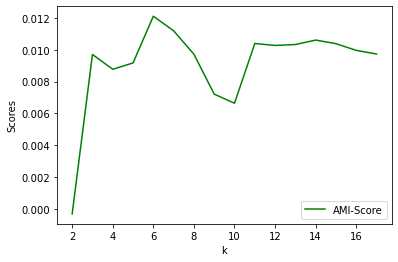

In [89]:
range_n_clusters=list(range(2, 18, 1))
ami_scores_rp_gmm = ami_plot(X_rp,range_n_clusters,"GMM")

# Feature selection ExtraTreesClassifier

In [91]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
clf = ExtraTreesClassifier(random_state=40,n_estimators=100)
clf = clf.fit(X_train, y_train)
etc_model = SelectFromModel(clf, prefit=True)
X_etc= etc_model.transform(X_train)
print(X_etc.shape)

(3435, 3)


# ETC k-Means

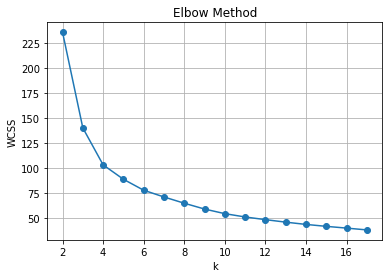

In [92]:
range_n_clusters=list(range(2, 18, 1))
k_means(X_etc,range_n_clusters)

For n_clusters=2, The Silhouette Score is 0.3973470040740567
-----------------------------------------------------------------------------
For n_clusters=3, The Silhouette Score is 0.4547441516813001
-----------------------------------------------------------------------------
For n_clusters=4, The Silhouette Score is 0.3834396291485807
-----------------------------------------------------------------------------
For n_clusters=5, The Silhouette Score is 0.3332550371894776
-----------------------------------------------------------------------------
For n_clusters=6, The Silhouette Score is 0.3325258199349485
-----------------------------------------------------------------------------
For n_clusters=7, The Silhouette Score is 0.29455508536835734
-----------------------------------------------------------------------------
For n_clusters=8, The Silhouette Score is 0.3112123373318112
-----------------------------------------------------------------------------
For n_clusters=9, The Silh

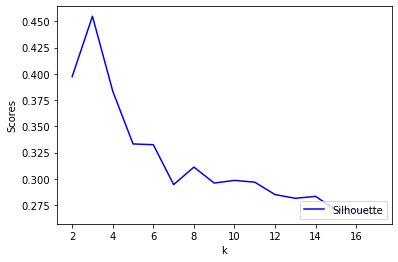

In [93]:
range_n_clusters=list(range(2, 18, 1))
silhouette_scores_etc_kmeans = silhouette_plot(X_etc,range_n_clusters,"k-Means")

For n_clusters=2, The Adjusted MI Score is 0.04430082162254218
-----------------------------------------------------------------------------
For n_clusters=3, The Adjusted MI Score is 0.03858932311199663
-----------------------------------------------------------------------------
For n_clusters=4, The Adjusted MI Score is 0.03402787768209013
-----------------------------------------------------------------------------
For n_clusters=5, The Adjusted MI Score is 0.029153115868651505
-----------------------------------------------------------------------------
For n_clusters=6, The Adjusted MI Score is 0.02817031303401971
-----------------------------------------------------------------------------
For n_clusters=7, The Adjusted MI Score is 0.028537148000080934
-----------------------------------------------------------------------------
For n_clusters=8, The Adjusted MI Score is 0.02552027771180743
-----------------------------------------------------------------------------
For n_clust

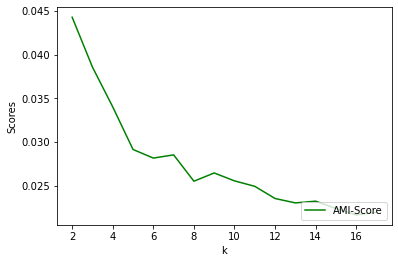

In [94]:
range_n_clusters=list(range(2, 18, 1))
ami_scores_etc_kmeans = ami_plot(X_etc,range_n_clusters,"k-Means")

# ETC EMM

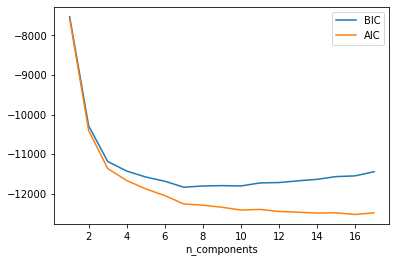

In [95]:
n_components = np.arange(1, 18)
gmm_bic_analysis(X_etc,n_components)

For n_clusters=2, The Adjusted MI Score is 0.012185836578209817
-----------------------------------------------------------------------------
For n_clusters=3, The Adjusted MI Score is 0.03210499660422127
-----------------------------------------------------------------------------
For n_clusters=4, The Adjusted MI Score is 0.03076560739166801
-----------------------------------------------------------------------------
For n_clusters=5, The Adjusted MI Score is 0.028810071665460544
-----------------------------------------------------------------------------
For n_clusters=6, The Adjusted MI Score is 0.028315886462234124
-----------------------------------------------------------------------------
For n_clusters=7, The Adjusted MI Score is 0.02729292300754485
-----------------------------------------------------------------------------
For n_clusters=8, The Adjusted MI Score is 0.026952771573265002
-----------------------------------------------------------------------------
For n_clu

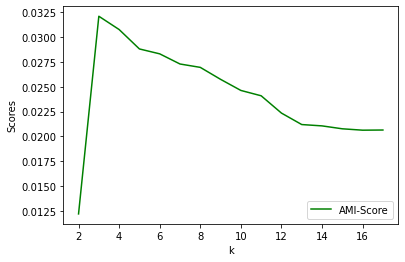

In [96]:
range_n_clusters=list(range(2, 18, 1))
ami_scores_etc_gmm = ami_plot(X_etc,range_n_clusters,"GMM")